### Project Description
Estimate the value of houses in Ames, Iowa, using 79 explanatory variables. The dataset is fairly small, with only 1460 training samples. The 79 features in the dataset are a mix of categorical and numerical features, and leave a lot of room for feature engineering.

This notebook merely preprocesses the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
# set keggle on True if you want data for keggle competition
# else leave on keggle on False for normal data
keggle = True

In [3]:
# import data
data = pd.read_csv('data/AmesHousing.csv')
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')

data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### OVERVIEW

There are multiple types of variables. Integers, floats, strings, NaN's. Use df.info() to gain detailed insight.


In [4]:
# display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

There are 2930 entries, numbered 0 to 2929, with **81 different features**. The **target feature** is 'SalePrice'. 

Out of all the columns there are several that have missing values. For instance, 'Alley', 'Pool QC', 'Fence', and 'Misc Feature'. These need to be fixed. 

### Cleaning the data

In [5]:
# drop column 'Order' since it is unique for each house
clean_data = data.drop('Order', axis=1)

In [6]:
# get overview of missing values
clean_data.isnull()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


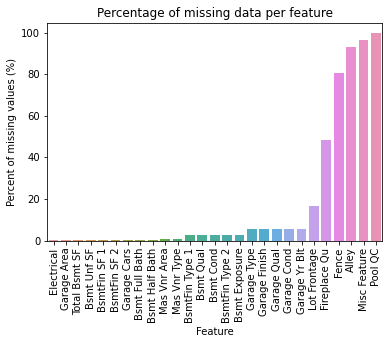

In [7]:
def missing_data(df):
    ''' Calculates and returns the percentage of missing data per feature. '''
    percentage = 100 * df.isnull().sum() / len(df)
    
    # sort in ascending order
    return percentage[percentage > 0].sort_values()

percent_missing_data = missing_data(clean_data)

sns.barplot(x = percent_missing_data.index, y = percent_missing_data)
plt.title('Percentage of missing data per feature')
plt.xlabel('Feature')
plt.ylabel('Percent of missing values (%)')
plt.xticks(rotation = 90)
plt.show()

### Chosing how to deal with missing values

There are the following options/steps:

1. Delete each row (sample) that contains a missing value
2. Delete the whole column (feature) containing the missing values
3. Replace the missing values with some other value

**Option 1**

Delete each row(sample) that contains a missing value.

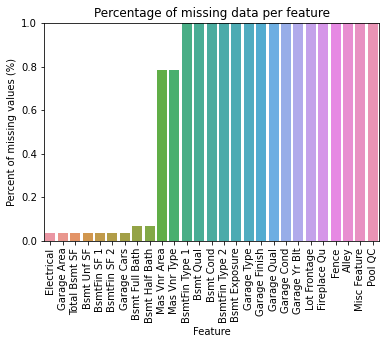

In [8]:
# display rows that miss more than 1% of the data
sns.barplot(x = percent_missing_data.index, y = percent_missing_data)
plt.xticks(rotation = 90)
plt.ylim(0 , 1)

# set labels
plt.title('Percentage of missing data per feature')
plt.xlabel('Feature')
plt.ylabel('Percent of missing values (%)')
plt.show()

# drop rows that miss less than 1% of the data
drop_rows = percent_missing_data[percent_missing_data <= 1]
drop_rows = drop_rows.index.tolist()

if keggle == False:
    clean_data = clean_data.dropna(axis = 'index', subset = drop_rows)

**Option 2**

Delete the whole column (feature) containing the missing values

In [9]:
# select the features with more than 20% data missing
drop_features = percent_missing_data[percent_missing_data >= 20]
drop_features = drop_features.index.tolist()

# remove those features
clean_data = clean_data.drop(drop_features, axis = 1)

**Option 3**

Replace the missing values with some other value. For **categorical data**, replace the missing value with 'none'.
For **numerical data**, replace the missing value with the average value of that feature.

First, single out the features that have missing values. 

In [10]:
# select features that have missing values between 1 and 20 percent missing data
discuss_features = percent_missing_data[np.logical_and(percent_missing_data > 1, percent_missing_data < 20)]
discuss_features = discuss_features.index.tolist()

print(f"The following features have missing values: {', '.join(discuss_features)}\n")

The following features have missing values: BsmtFin Type 1, Bsmt Qual, Bsmt Cond, BsmtFin Type 2, Bsmt Exposure, Garage Type, Garage Finish, Garage Qual, Garage Cond, Garage Yr Blt, Lot Frontage



In [11]:
# replace missing values
def replace_values(df):
    """
    This function replaces the missing values in the dataframe. If the missing
    value is in a categorical feature, we replace the value for a 'None' string. 
    In this case, you can still use that feature. For the numeric features, we 
    replaced the missing values with the average number of that feature. 
    
    """
    for feature in df:
        
        # single out categorical features and replace missing value with none
        if clean_data.dtypes[feature] == object:
            clean_data[feature] = clean_data[feature].fillna('None')

        # single out numerical features and replace missing value with mean
        else: 
            clean_data[feature] = clean_data[feature].fillna(clean_data[feature].mean())
            
    return clean_data
        
# replace missing values left in dataframe
clean_data = replace_values(clean_data)

## Dealing with categorical features who are classified as numeric features
Some features in this dataset are stored as numeric data, but we saw in the given data that those are actually categorical features. That's why we convert those numeric data to string values, so they get the same treatment as categorical features.

The only feature that is wrongly classified is: MS SubClass (the building class)

In [12]:
clean_data["MS SubClass"] = clean_data["MS SubClass"].apply(str)

As seen above, none of the preselected numerical features hold a correlation of 0.9 or higher with eachother. Therefore, all of the features will be selected.

## Make dummies from categorical data


In [13]:
# display feature data types in cleaned data
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   object 
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2930 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [14]:
# split dataframe in numerical and 
cat_data = clean_data.select_dtypes(include = 'object')
num_data = clean_data.drop(cat_data, axis=1)

display(cat_data.head())
display(num_data.head())

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,526301100,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
1,526350040,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
2,526351010,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,526353030,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,527105010,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [15]:
# transform categorical features to one-hot-encoding
cat_data = pd.get_dummies(cat_data, drop_first=True)
display(cat_data.head())

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


## Rescaling data

In [16]:
# temporary remove houses unique ID's and target value Saleprice
# because these should not be rescaled
ID = num_data['PID']
target = num_data['SalePrice']
num_data = num_data.drop(['SalePrice', 'PID'], axis=1)

# transform Sale Price in log Sale Price
target = np.log10(target)

# feature scale numerical data using zscore 
# note that we do not want to normalize our one-hot encoded data as those are already within [0,1] range
# source: "https://stackoverflow.com/a/41713622"
num_data = num_data.apply(zscore)

In [17]:
# merge categorical and numerical dataframe
num_data = pd.concat([num_data, target, ID], axis = 1)
clean_data = pd.concat([cat_data, num_data], axis = 1)

# display ditribution of data
display(clean_data.describe())

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,PID
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2.930000e+03,2930.000000,2.930000e+03
mean,0.000341,0.044027,0.005802,0.020819,0.368259,0.047440,0.002048,0.006143,0.097952,0.196246,...,-1.826199e-16,8.476344e-17,2.418998e-16,6.820483e-18,1.579775e-15,1.169808e-16,-1.720277e-17,-6.747170e-14,5.220640,7.144645e+08
std,0.018474,0.205191,0.075963,0.142803,0.482415,0.212615,0.045214,0.078152,0.297301,0.397224,...,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,1.000171e+00,0.177013,1.887308e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.044927e-01,-3.588380e-01,-1.031343e-01,-2.853544e-01,-6.303105e-02,-8.942228e-02,-1.921881e+00,-1.360118e+00,4.106837,5.263011e+08
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.044927e-01,-3.588380e-01,-1.031343e-01,-2.853544e-01,-6.303105e-02,-8.942228e-02,-8.165133e-01,-6.004640e-01,5.112270,5.284770e+08
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.043260e-01,-3.588380e-01,-1.031343e-01,-2.853544e-01,-6.303105e-02,-8.942228e-02,-7.960156e-02,1.591904e-01,5.204120,5.354536e+08
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.329765e-01,-3.588380e-01,-1.031343e-01,-2.853544e-01,-6.303105e-02,-8.942228e-02,6.573102e-01,9.188447e-01,5.329398,9.071811e+08
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.029268e+01,1.542207e+01,2.010609e+01,9.986090e+00,2.241449e+01,2.993278e+01,2.131134e+00,1.678499e+00,5.877947,1.007100e+09


In [18]:
# display info clean_data
clean_data.info()
clean_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 272 entries, MS SubClass_150 to PID
dtypes: float64(36), int64(1), uint8(235)
memory usage: 1.5 MB


,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,PID
0,0,0,0,0,1,0,0,0,0,0,...,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499,5.332438,526301100
1,0,0,0,0,1,0,0,0,0,0,...,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499,5.021189,526350040
2,0,0,0,0,1,0,0,0,0,0,...,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499,5.235528,526351010
3,0,0,0,0,1,0,0,0,0,0,...,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,5.387390,526353030
4,0,0,0,0,0,0,0,0,0,1,...,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499,5.278525,527105010


## Splitting data in test and training data

In [19]:
# extract training and test houses in clean_data with ID
train_ID = train_data['PID'].to_numpy()
test_ID = test_data['PID'].to_numpy()

# split dataframe into test and train data based on keggle split
train_data = clean_data[clean_data['PID'].isin(train_ID)]
test_data = clean_data[clean_data['PID'].isin(test_ID)]    

In [20]:
# drop PID's
clean_data = clean_data.drop('PID', axis=1)
num_data = num_data.drop('PID', axis=1)
train_data = train_data.drop('PID', axis=1)
test_data = test_data.drop('PID', axis=1)

In [21]:
train_data.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499,5.235528
5,0,0,0,0,0,0,0,0,0,1,...,2.107394,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.079602,1.678499,5.291147
7,0,0,0,0,0,0,0,0,0,0,...,-0.742060,0.510828,-0.358838,-0.103134,2.282507,-0.063031,-0.089422,-1.921881,1.678499,5.282169


In [22]:
test_data.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
3,0,0,0,0,1,0,0,0,0,0,...,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499,5.278525
6,0,0,0,0,0,0,0,0,0,0,...,-0.742060,-0.704493,2.292105,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,5.329398
10,0,0,0,0,0,0,0,0,0,1,...,0.500618,0.540470,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,5.245266
13,0,0,0,0,1,0,0,0,0,0,...,0.777649,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.553425,1.678499,5.234264


## Exporting data to csv files

In [23]:
# export keggle cleaned train and test data to seperate csv file
# export final cleaned dataframe to csv file  
if keggle:
    clean_data.to_csv('data/keggle_complete_data.csv')  
    train_data.to_csv('data/keggle_train_data.csv')
    test_data.to_csv('data/keggle_test_data.csv')


else:   
    # export final cleaned dataframe to csv file
    clean_data.to_csv('data/clean_data.csv')
    train_data.to_csv('data/clean_train_data.csv')
    test_data.to_csv('data/clean_test_data.csv')
    
    # export cleaned numerical and categorical data to seperate csv file
    num_data.to_csv('data/num_clean_data.csv')
    cat_data.to_csv('data/cat_clean_data.csv')

In [24]:
# display data information
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 271 entries, MS SubClass_150 to SalePrice
dtypes: float64(36), uint8(235)
memory usage: 1.5 MB
